Importing Libraries

In [81]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

About Dataset


Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [82]:
fraud=pd.read_csv('/content/Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


Data Exploration

In [83]:
fraud.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [84]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

 Descriptive Analysis

In [85]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [86]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [87]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Undergrad','Marital.Status','Urban'])
fraud1=encoder.fit_transform(fraud)

In [90]:
fraud1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,1,1,68833,50047,10,1
1,2,2,33700,134075,18,1
2,1,3,36925,160205,30,1
3,2,1,50190,193264,15,1
4,1,3,81002,27533,28,2
...,...,...,...,...,...,...
595,2,2,76340,39492,7,1
596,2,2,69967,55369,2,1
597,1,2,47334,154058,0,1
598,2,3,98592,180083,17,2


 Feature Engineering

In [89]:
fraud1['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

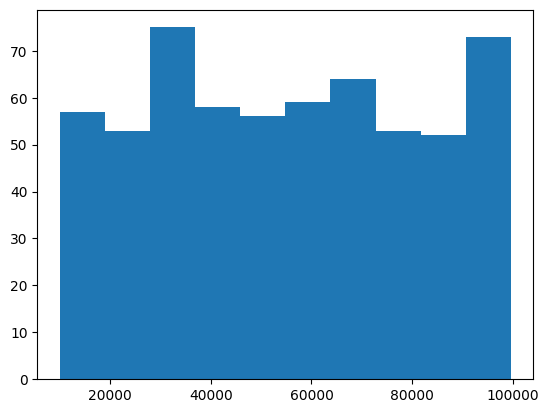

In [91]:
plt.hist('Taxable.Income', data=fraud1)
plt.show()

Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [92]:
tax_val = []
for value in fraud1["Taxable.Income"]:
    if value<=30000:
        tax_val.append("Risky")
    else:
        tax_val.append("Good")
        
fraud1["tax_val"]= tax_val

In [93]:
fraud1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_val
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good
...,...,...,...,...,...,...,...
595,2,2,76340,39492,7,1,Good
596,2,2,69967,55369,2,1,Good
597,1,2,47334,154058,0,1,Good
598,2,3,98592,180083,17,2,Good


In [94]:
x=fraud1.drop(['tax_val','Taxable.Income'],axis=1)
y=fraud1['tax_val']

In [95]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,1,50047,10,1
1,2,2,134075,18,1
2,1,3,160205,30,1
3,2,1,193264,15,1
4,1,3,27533,28,2
...,...,...,...,...,...
595,2,2,39492,7,1
596,2,2,55369,2,1
597,1,2,154058,0,1
598,2,3,180083,17,2


In [96]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_val, Length: 600, dtype: object

In [97]:
colnames = list(fraud1.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'tax_val']

In [98]:
#spilliting data into training and testing data set
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.2,random_state=10)

In [99]:
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(480, 5) (120, 5) (480,) (120,)


In [100]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
284,1,2,188383,22,1
423,1,3,80249,19,1
525,2,1,75307,23,2
519,2,1,162102,25,1
12,1,2,148033,14,1
...,...,...,...,...,...
369,1,3,89122,28,2
320,2,1,78897,11,1
527,1,3,180274,27,2
125,2,2,155669,11,2


In [101]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
69,2,1,86896,29,2
27,2,1,28542,12,1
488,2,1,76718,10,1
540,2,1,110308,22,2
285,1,1,63420,10,2
...,...,...,...,...,...
131,2,1,174321,16,1
354,2,3,176891,27,1
230,1,3,81593,14,1
175,2,1,57055,13,2


In [102]:
y_train

284    Risky
423     Good
525     Good
519     Good
12     Risky
       ...  
369     Good
320     Good
527     Good
125     Good
265    Risky
Name: tax_val, Length: 480, dtype: object

In [103]:

y_test

69      Good
27      Good
488     Good
540    Risky
285     Good
       ...  
131     Good
354    Risky
230    Risky
175     Good
339    Risky
Name: tax_val, Length: 120, dtype: object

In [109]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [110]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

Good     119
Risky      1
dtype: int64

In [111]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [112]:
pd.crosstab(y_test,preds)

col_0,Good,Risky
tax_val,,
Good,93,1
Risky,26,0


In [113]:
#accuracy
np.mean(preds==y_test)

0.775

Classification report

In [114]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

        Good       0.99      0.78      0.87       119
       Risky       0.00      0.00      0.00         1

    accuracy                           0.78       120
   macro avg       0.49      0.39      0.44       120
weighted avg       0.98      0.78      0.87       120



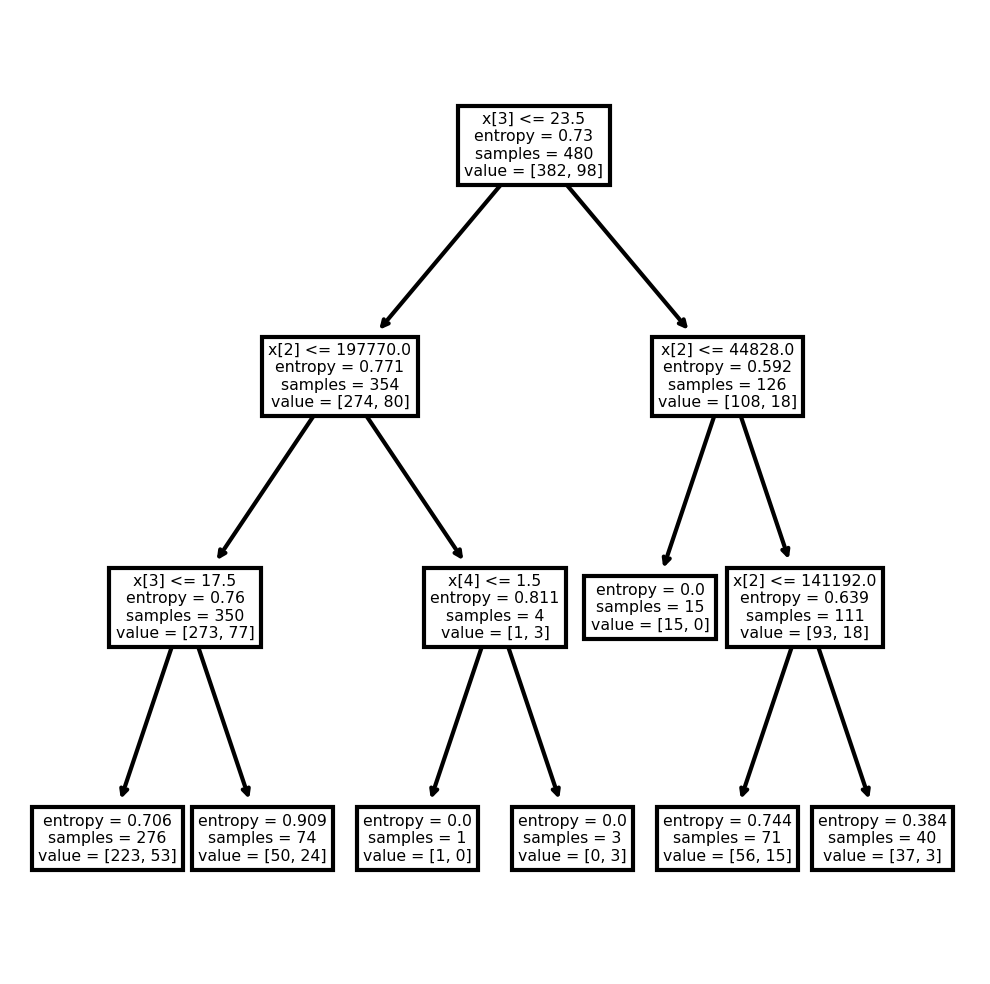

In [115]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#Plot the decision tree
tree.plot_tree(model);

Text(0.5, 1.0, 'Decision tree using Entropy')

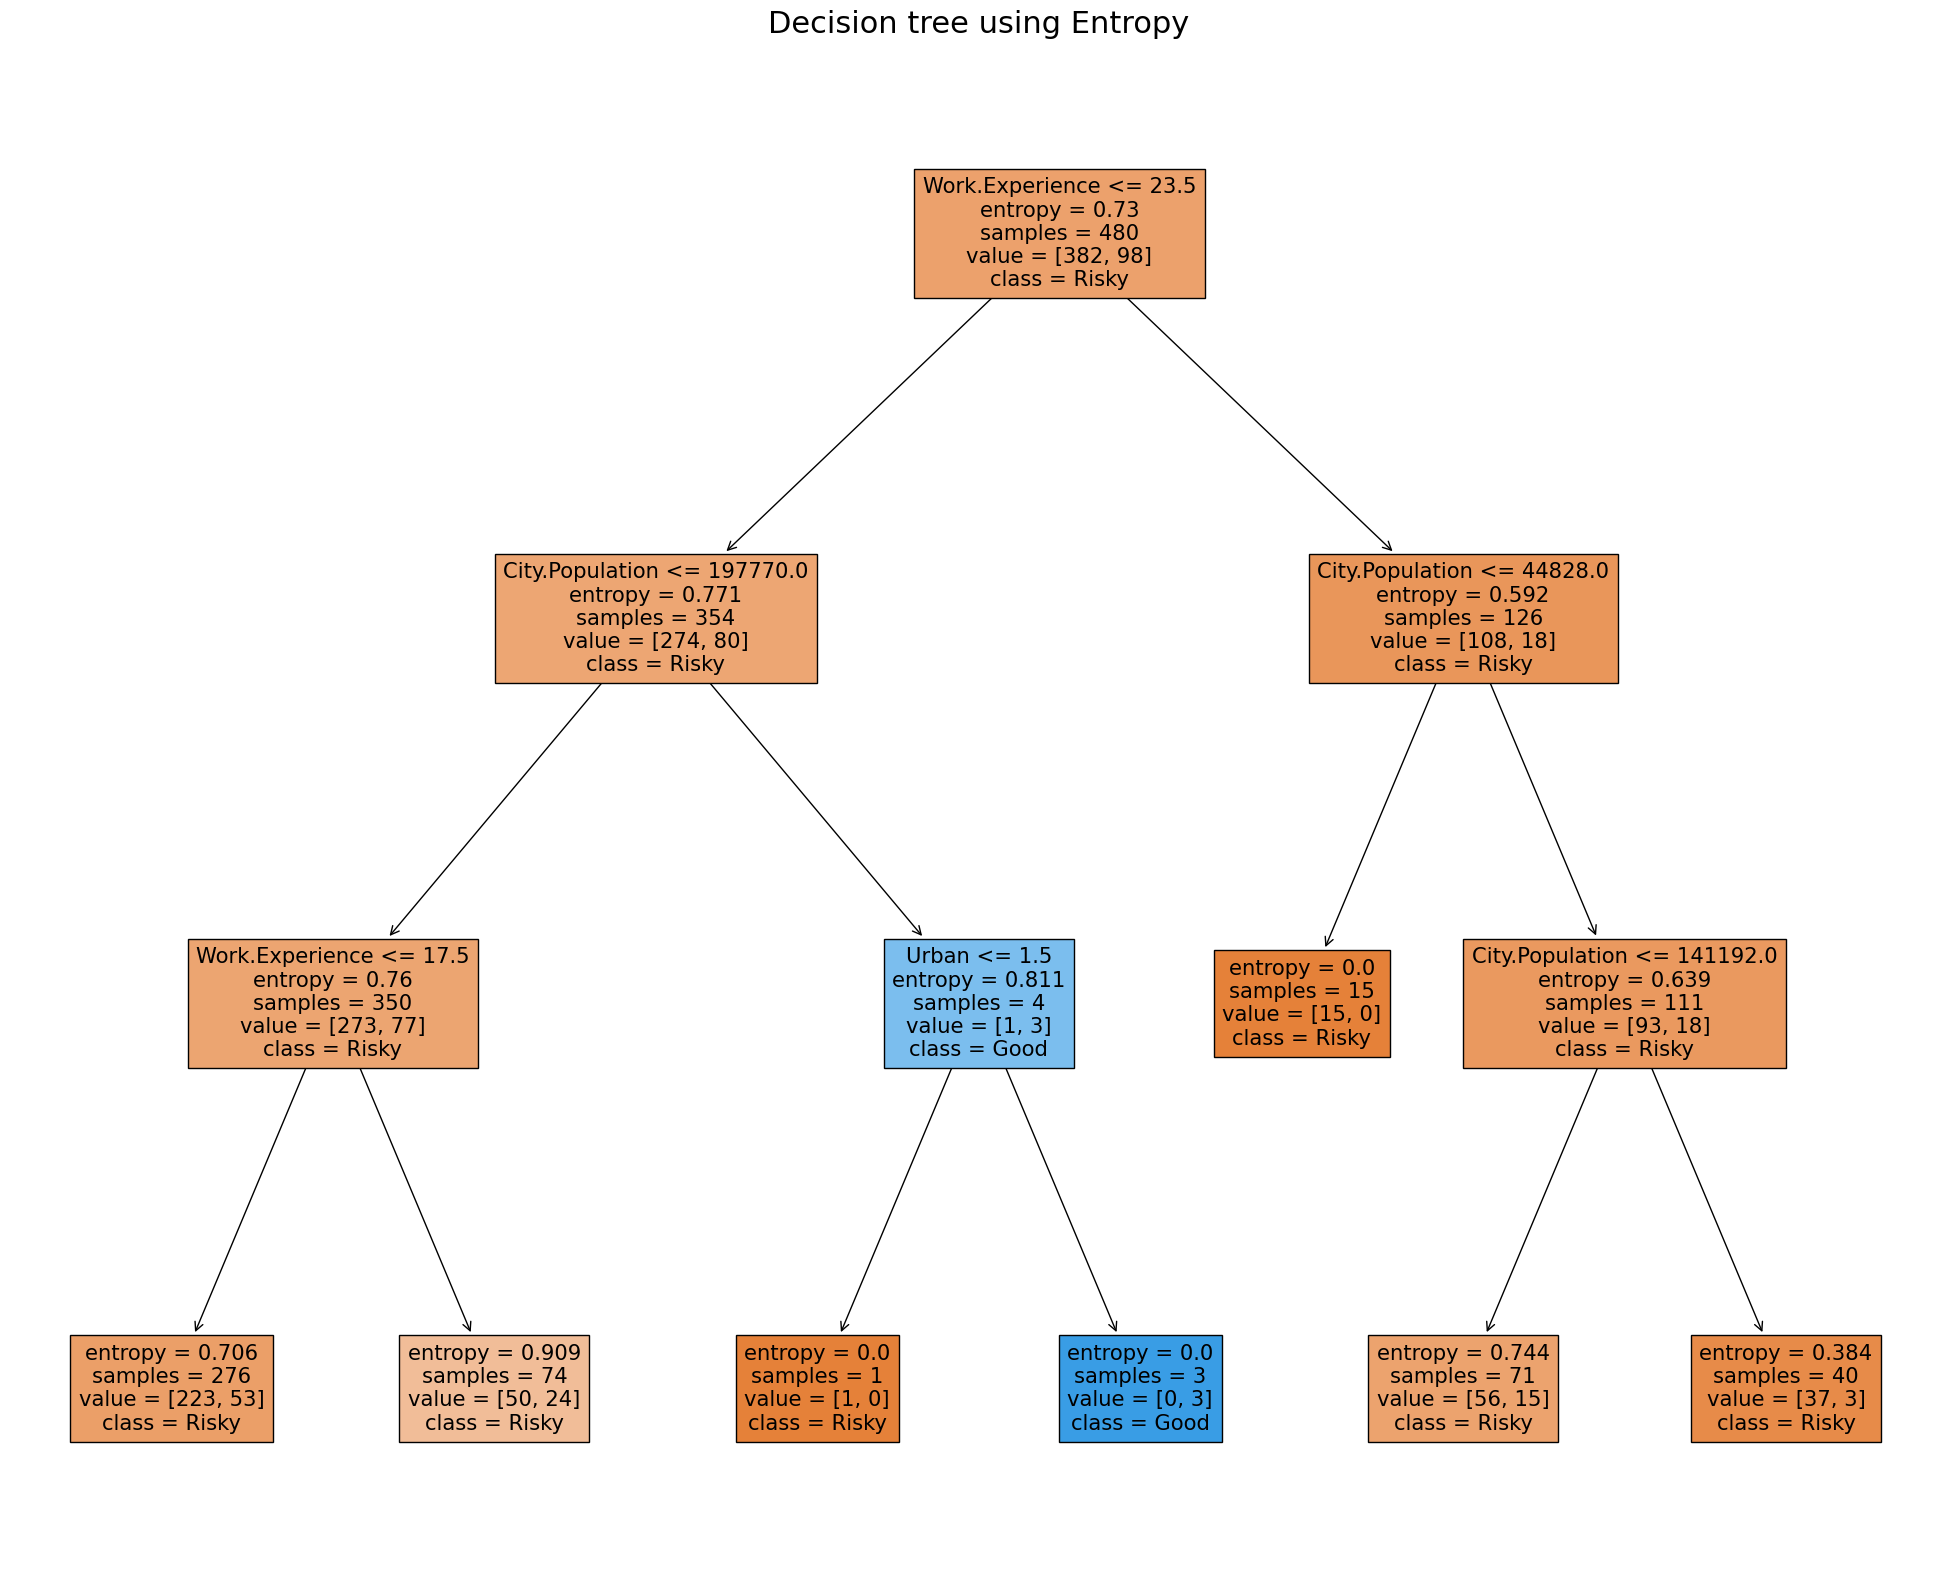

In [118]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
                     feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

Building Decision Tree Classifier (CART) using Gini Criteria

In [130]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [131]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [132]:
#Prediction and computing the accuracy
preds=model_gini.predict(x_test)
np.mean(preds==y_test)

0.775

Text(0.5, 1.0, 'Decision tree using Entropy')

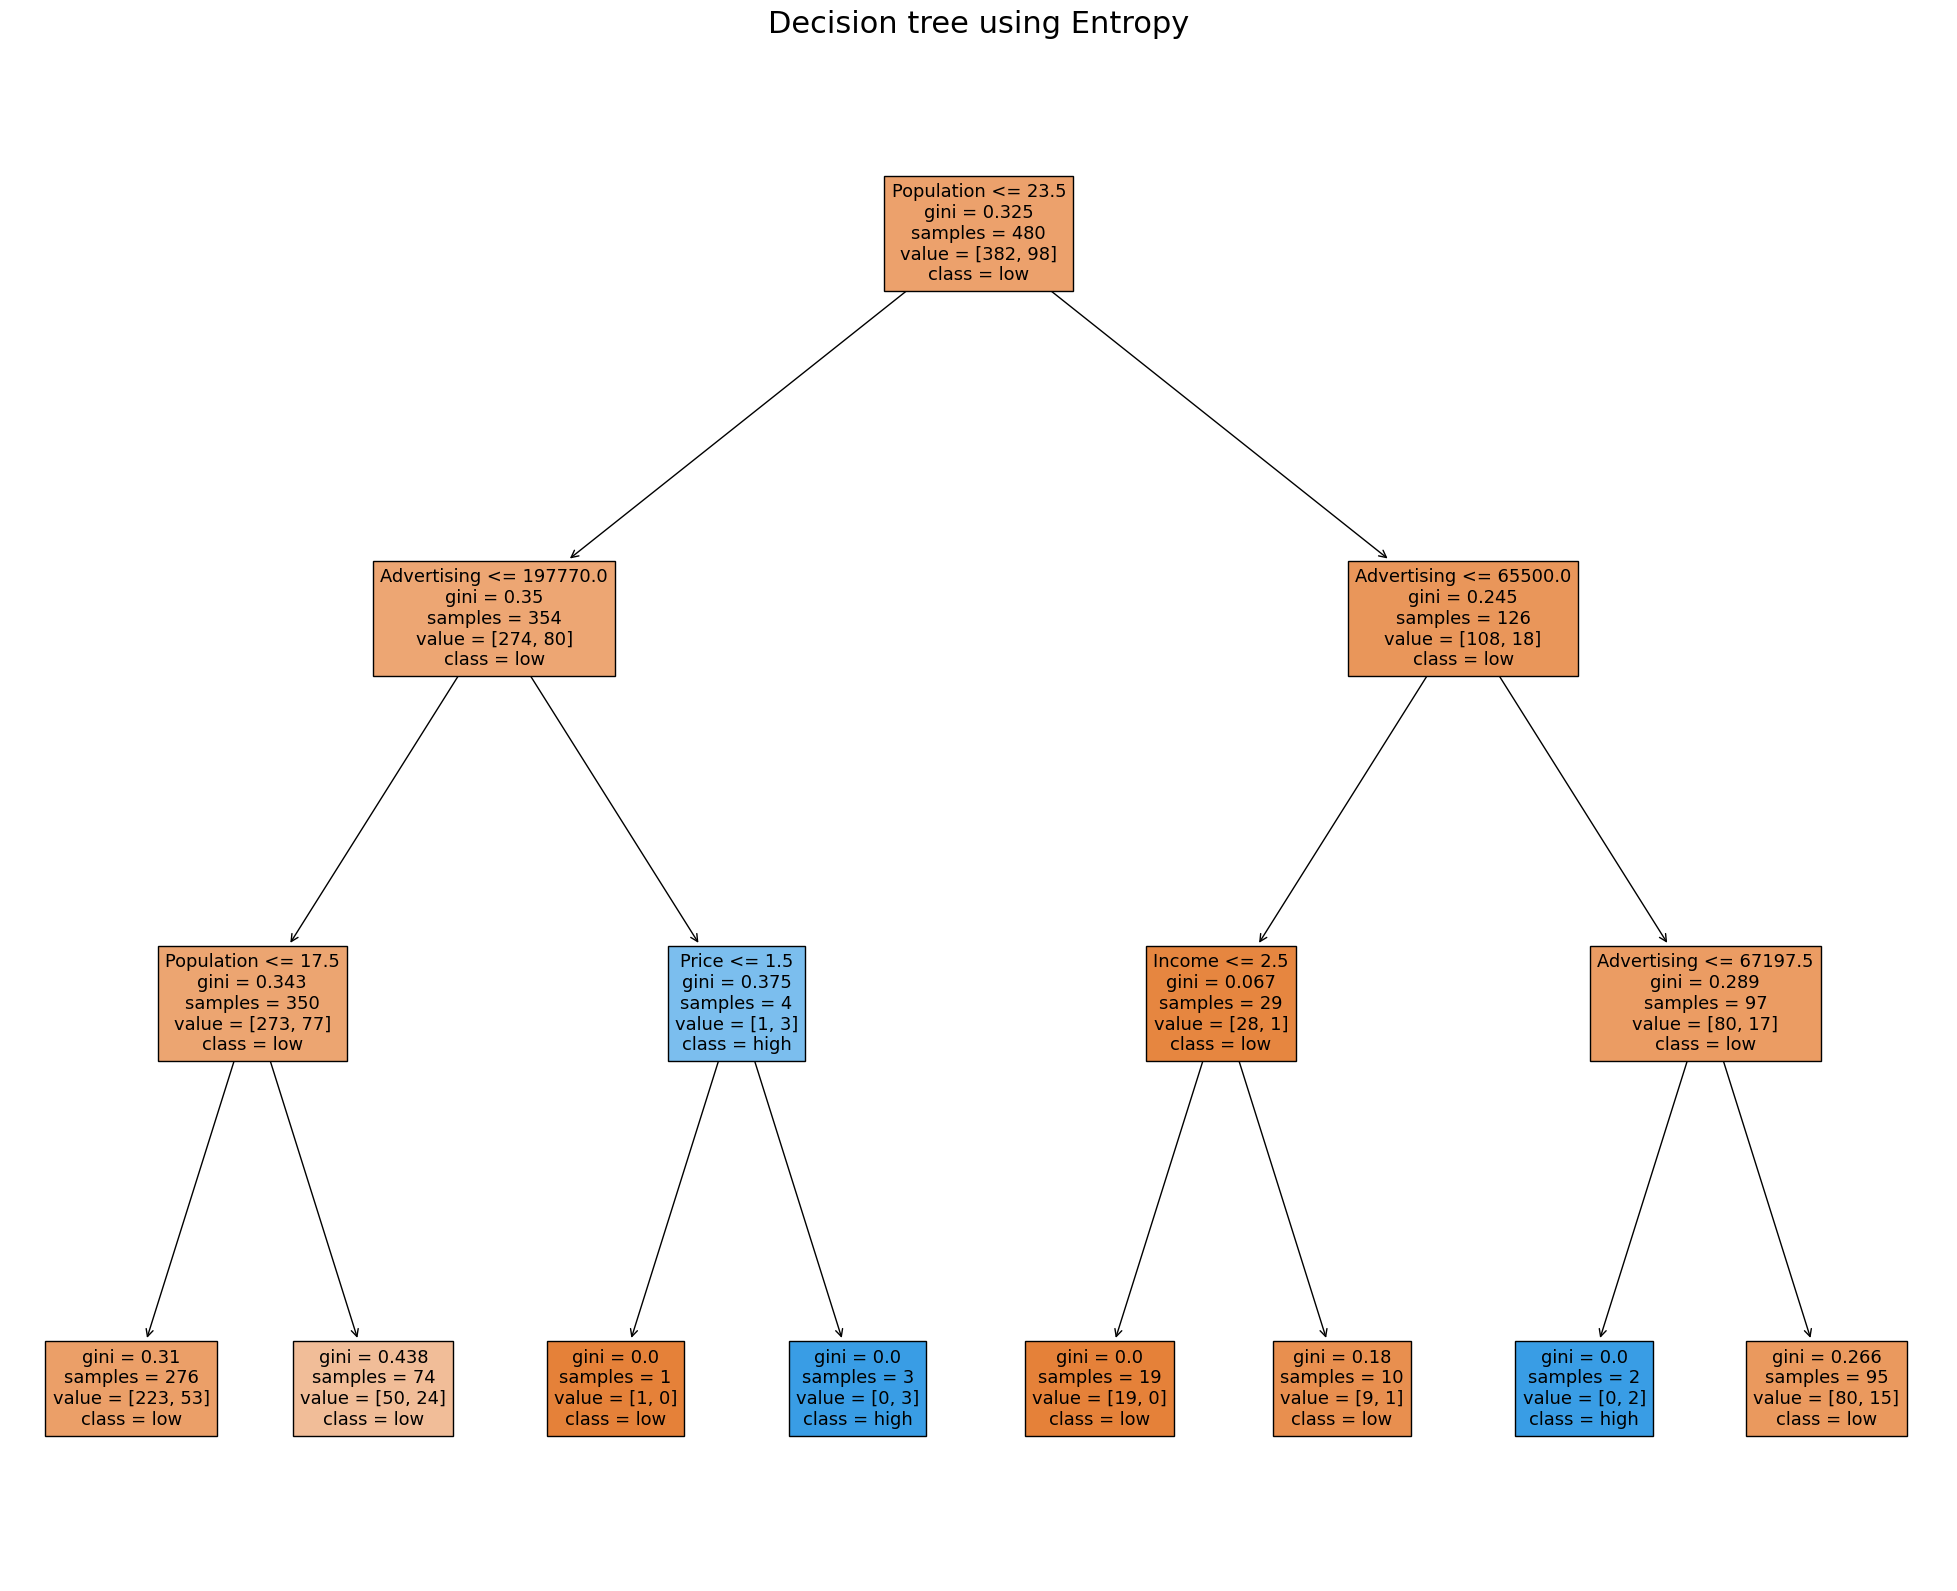

In [133]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)